Found 50 groups
Group alphalog-478ab32e has 20 logs
{'obs': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'reward': 0.41317445039749146, 'reward_override': False, 'key': 'alphalog-478ab32e-44', 'done': False, 'act': array([ 0.        ,  0.        , -0.12138486,  0.04486609], dtype=float32), 'next_obs': array([0.        , 0.        , 0.        , ..., 0.58618057, 0.70876294,
       1.171613  ], dtype=float32)}


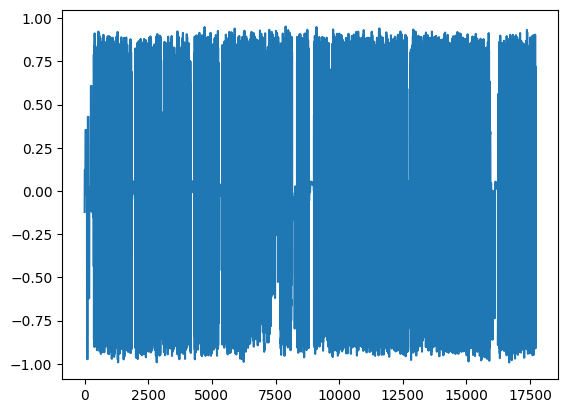

In [4]:
import os
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt

from src.train.rldataset import MsgVecDataset
from src.config import HOST_CONFIG, MODEL_CONFIGS

brain_config = MODEL_CONFIGS["basic-brain-test1"]
cache = MsgVecDataset(os.path.join(HOST_CONFIG.RECORD_DIR), brain_config)

groups = cache.lh.group_logs()
print(f"Found {len(groups)} groups")

group = random.choice(groups)
print(f"Group {group[0].get_runname()} has {len(group)} logs")

samples = list(cache.generate_log_group(group, shuffle_within_group=False))

# Plot an action from each sample
print(samples[0])
plt.plot([s["act"][2] for s in samples])


<BarContainer object of 100 artists>

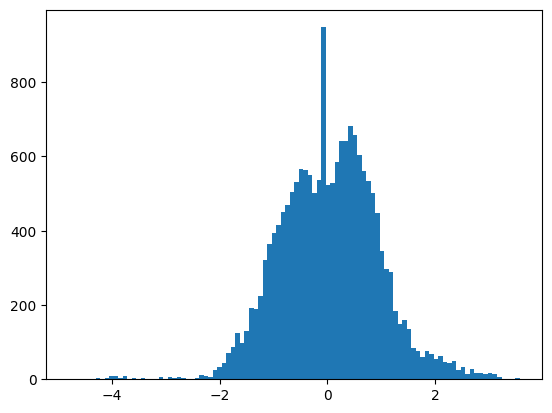

In [42]:
# Plot histogram of an action from each sample
counts, bins = np.histogram([s["obs"][3] for s in samples], bins=100)

plt.bar(bins[:-1], counts, width=np.diff(bins))

In [67]:
# Get an instance of the brain model, and see the actions when you feed in slightly perturbed observations
import onnxruntime
from src.train.modelloader import create_and_validate_onnx
onnx_path = create_and_validate_onnx(brain_config)

sess = onnxruntime.InferenceSession(onnx_path)

index = 540

sample_orig = np.copy(samples[index]["obs"])
sample_mod = np.copy(samples[index]["obs"])
print(sample_orig.shape)

# Add random noise to sample_mod
sample_mod += np.random.normal(0, 0.1, sample_mod.shape)

orig_outputs = sess.run(None, {"observation": sample_orig.reshape(1, -1)})
mod_outputs = sess.run(None, {"observation": sample_mod.reshape(1, -1)})

print(orig_outputs)
print(mod_outputs)

Found cached ONNX model /media/storage/robotaicache/models/basic-brain-test1-sb3-run24-bf8d2a80f6af6174_orig.onnx
PT-ONNX Output 0 matches: 100.000%
(34211,)
-0.29492188
[array([[ 0.6403418 , -0.73582673, -0.41091526,  0.7412367 ]],
      dtype=float32)]
[array([[ 0.67930335, -0.73653257, -0.31821138,  0.7625926 ]],
      dtype=float32)]
